In [19]:
# Importing needed libraries 
# Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
# Reading our file with pandas
# Считываем наш файл

conversion = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lavrukhin/conversion.csv')

# 1.Step. Explore data and find missing values in data, if you find it - clear them all. 

In [3]:
# 1.Step. Explore data and find missing values in data, if you find it - clear them all. 

# Lets make some EDA
# Сделаем небольшой разведывательный анализ

conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
# Checking for missing data
# Проверяем отсутсвующие данные

conversion.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
# Checking for unique data
# Смотрим на уникальные данные

conversion.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

# Step 2. Make a distplot to see number of Impressions for each promo campaighn on Facebook 

In [6]:
# Filtering our data at first to make the right distplot
# Для начала отфильтруем данные чтобы получился правильный график

fb_camp = conversion.groupby('fb_campaign_id')['Impressions'].agg('sum')
fb_camp

fb_campaign_id
103916       7350
103917      17861
103920        693
103928       8392
103929       1915
           ...   
179977    1129773
179978     637549
179979     151531
179981     790253
179982     513161
Name: Impressions, Length: 691, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


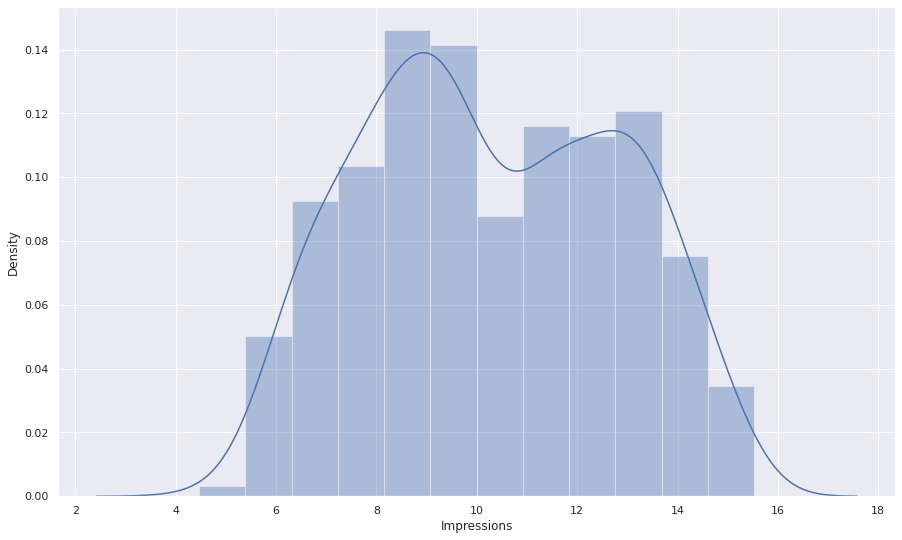

In [7]:
# Making a distplot to see number of Impressions for each promo campaighn on Facebook  
# Постройте график распределения числа показов для каждой рекламной кампании в Facebook, прологарифмировав значения.

width = 15
height = 9
sns.set(rc = {'figure.figsize':(width, height)})
sns.distplot(np.log(fb_camp), kde=True)

# We can see that: Our 'distribution' is not normal, it's bimodal. 
# Мы видим, что наше распределение не является нормальным и является бимодальным.


# Step. 3 Let's find our CTR
# Посмотрим на наш CTR

In [8]:
# Creating CTR column and making some calculation
# Посчитаем CTR и создадим новую колонку

conversion['CTR'] = conversion.Clicks / conversion.Impressions

In [9]:
# Looking for id with highest click-through rate.
# Найдем пользователя с максимальным показателем.

ad_id_CTR = conversion[['ad_id', 'CTR']]
ad_id_CTR.sort_values('CTR', ascending= False)

,ad_id,CTR
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
270,777166,0.000000
269,777131,0.000000
268,777130,0.000000
266,776935,0.000000


In [10]:
CTR_916 = conversion.query('xyz_campaign_id == 916')
CTR_916

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,0.000000
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.000192
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,0.000091
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,0.000316


## Step.4 Building campaigns visualisation to better understand our data

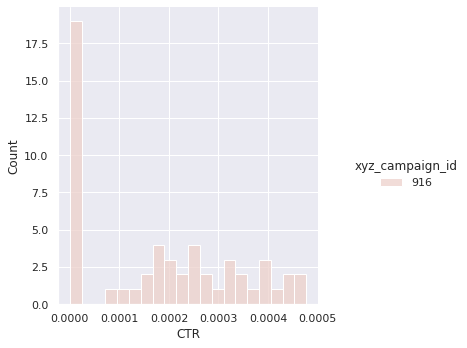

In [38]:
# Visualising camp 916

sns.displot(data=CTR_916, x="CTR",hue ="xyz_campaign_id", multiple="stack", bins=20)

In [12]:
# Visualising camp 936

CTR_936 = conversion.query('xyz_campaign_id == 936')
CTR_936

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
54,734209,936,108654,30-34,M,10,1772,0,0.00,1,1,0.000000
55,734210,936,108654,30-34,M,10,13329,4,5.63,1,1,0.000300
56,734215,936,108655,30-34,M,15,13659,3,3.84,1,0,0.000220
57,734243,936,108660,30-34,M,21,739,0,0.00,1,1,0.000000
58,734266,936,108664,30-34,M,25,605,0,0.00,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
513,951941,936,123750,30-34,F,28,2764,1,1.56,1,1,0.000362
514,952001,936,123760,45-49,F,10,5447,2,2.96,1,0,0.000367
515,952031,936,123765,40-44,F,16,28169,8,12.37,1,1,0.000284
516,952080,936,123774,40-44,F,27,415,0,0.00,1,0,0.000000


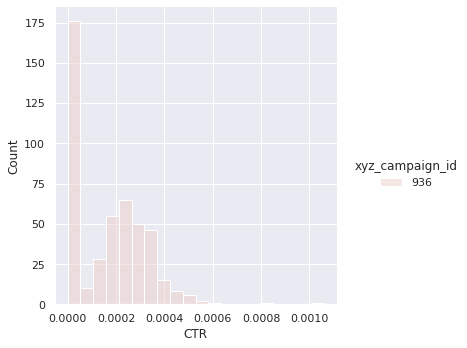

In [37]:
sns.displot(data=CTR_936, x="CTR",hue ="xyz_campaign_id", bins=20)

In [14]:
# Visualising camp 1178

CTR_1178 = conversion.query('xyz_campaign_id == 1178')
CTR_1178

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.000118
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.000105
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.000109
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171


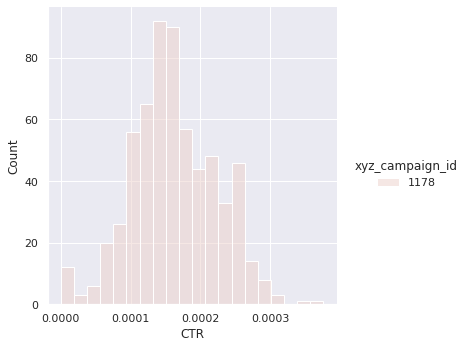

In [36]:
sns.displot(data=CTR_1178, x="CTR",hue ="xyz_campaign_id", bins=20)


## Step 5. Looking for new metric cost-per-click value(CPC) and addining new column to our frame.
## Создадим новую метрику и добавим колонку с ней в наш датафрейм.

In [31]:
# Calculating new metric CPC
# Высчитаем новую метрику

conversion['CPC'] = conversion.Spent / conversion.Clicks
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926


In [26]:
# Quick overview for our new metric
# Посмотрим описательную статистику нашей метрики

conversion.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [28]:
# Calculating interquartile range for our new metric
# Посчитаем межквартильный размах для нашей новой метрики

round(ss.iqr(conversion.CPC, nan_policy='omit'), 2)

0.25

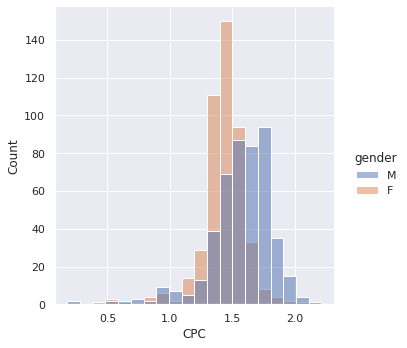

In [35]:
# Visualising our metric by gender.

sns.displot(data=conversion.dropna(), x="CPC",hue ="gender", bins= 20)

## Step. 6 Conversion Rate

In [49]:
# Calculating conversion rate
# Посчитаем конверсию для наших данных

conversion['CR'] = round(conversion.Approved_Conversion / conversion.Clicks * 100, 2)

In [51]:
# let's check CR for ad_id - 1121814

conversion.query('ad_id == 1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09
